# DSA 2040 Practical Exam - Section 2: Data Mining

**Student Name:** Arnold Bophine Odiyo  
**Student ID:** 821  
**Date:** December 11, 2025

---

## Overview

This notebook demonstrates comprehensive **Data Mining** tasks using the Iris dataset. The workflow includes:

### Objectives:
1. **Preprocessing** - Load, clean, normalize, and explore the Iris dataset
2. **Clustering** - Apply K-Means clustering and evaluate performance
3. **Classification** - Build Decision Tree and KNN classifiers
4. **Association Rule Mining** - Discover patterns in synthetic market basket data

## 1. Import Required Libraries

We'll use:
- `pandas` and `numpy` for data manipulation
- `sklearn` for machine learning algorithms
- `matplotlib` and `seaborn` for visualizations
- `mlxtend` for association rule mining

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random

# Sklearn imports
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

# Association rule mining
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

print("✓ All libraries imported successfully")

✓ All libraries imported successfully


## 2. Setup File Paths

Configure paths for saving outputs and visualizations.

In [2]:
# Get current working directory
CURRENT_DIR = os.getcwd()

# Determine project root
if os.path.basename(CURRENT_DIR) == 'DataMining':
    BASE_DIR = CURRENT_DIR
else:
    BASE_DIR = os.path.join(CURRENT_DIR, 'DataMining')

# Create output directory if it doesn't exist
os.makedirs(BASE_DIR, exist_ok=True)

print(f"Current Directory: {CURRENT_DIR}")
print(f"Output Directory: {BASE_DIR}")

Current Directory: c:\Users\Admin\Documents\GitHub\DSA-2040_Practical_Exam_Bophine_Arnold_Odiyo_821\DataMining
Output Directory: c:\Users\Admin\Documents\GitHub\DSA-2040_Practical_Exam_Bophine_Arnold_Odiyo_821\DataMining


---

# Part 1: Data Preprocessing

## 1.1 Load and Preprocess Iris Dataset

**Goal:** Load the Iris dataset and prepare it for analysis.

**Steps:**
- Load data from sklearn
- Check for missing values
- Normalize features using Min-Max scaling

In [3]:
print("--- 1.1 Load and Preprocess Iris Dataset ---")

# 1. Load Data
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("\nData Sample (First 5 rows):")
display(df.head())

print(f"\nDataset Shape: {df.shape}")
print(f"Features: {iris.feature_names}")
print(f"Classes: {list(iris.target_names)}")

--- 1.1 Load and Preprocess Iris Dataset ---

Data Sample (First 5 rows):


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa



Dataset Shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: [np.str_('setosa'), np.str_('versicolor'), np.str_('virginica')]


In [4]:
# 2. Handle Missing Values
print("\nChecking for missing values:")
print(df.isnull().sum())
print("✓ No missing values in Iris dataset")


Checking for missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64
✓ No missing values in Iris dataset


In [5]:
# 3. Normalize Features (Min-Max Scaling)
print("\nNormalizing features (Min-Max Scaling)...")
scaler = MinMaxScaler()
feature_cols = iris.feature_names
df_normalized = df.copy()
df_normalized[feature_cols] = scaler.fit_transform(df[feature_cols])

print("Normalized Data Sample:")
display(df_normalized.head())

print("\n✓ Preprocessing Complete")


Normalizing features (Min-Max Scaling)...
Normalized Data Sample:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,0.222222,0.625000,0.067797,0.041667,0,setosa
1,0.166667,0.416667,0.067797,0.041667,0,setosa
2,0.111111,0.500000,0.050847,0.041667,0,setosa
3,0.083333,0.458333,0.084746,0.041667,0,setosa
4,0.194444,0.666667,0.067797,0.041667,0,setosa



✓ Preprocessing Complete


## 1.2 Exploratory Data Analysis (EDA)

**Goal:** Understand the data distribution and relationships.

**Analysis:**
1. Summary statistics
2. Pairplot to visualize feature relationships
3. Correlation heatmap
4. Boxplots for outlier detection

In [6]:
print("--- 1.3 Exploratory Data Analysis (EDA) ---")

# 1. Summary Statistics
print("\nSummary Statistics:")
display(df.describe())

--- 1.3 Exploratory Data Analysis (EDA) ---

Summary Statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Generating Pairplot...


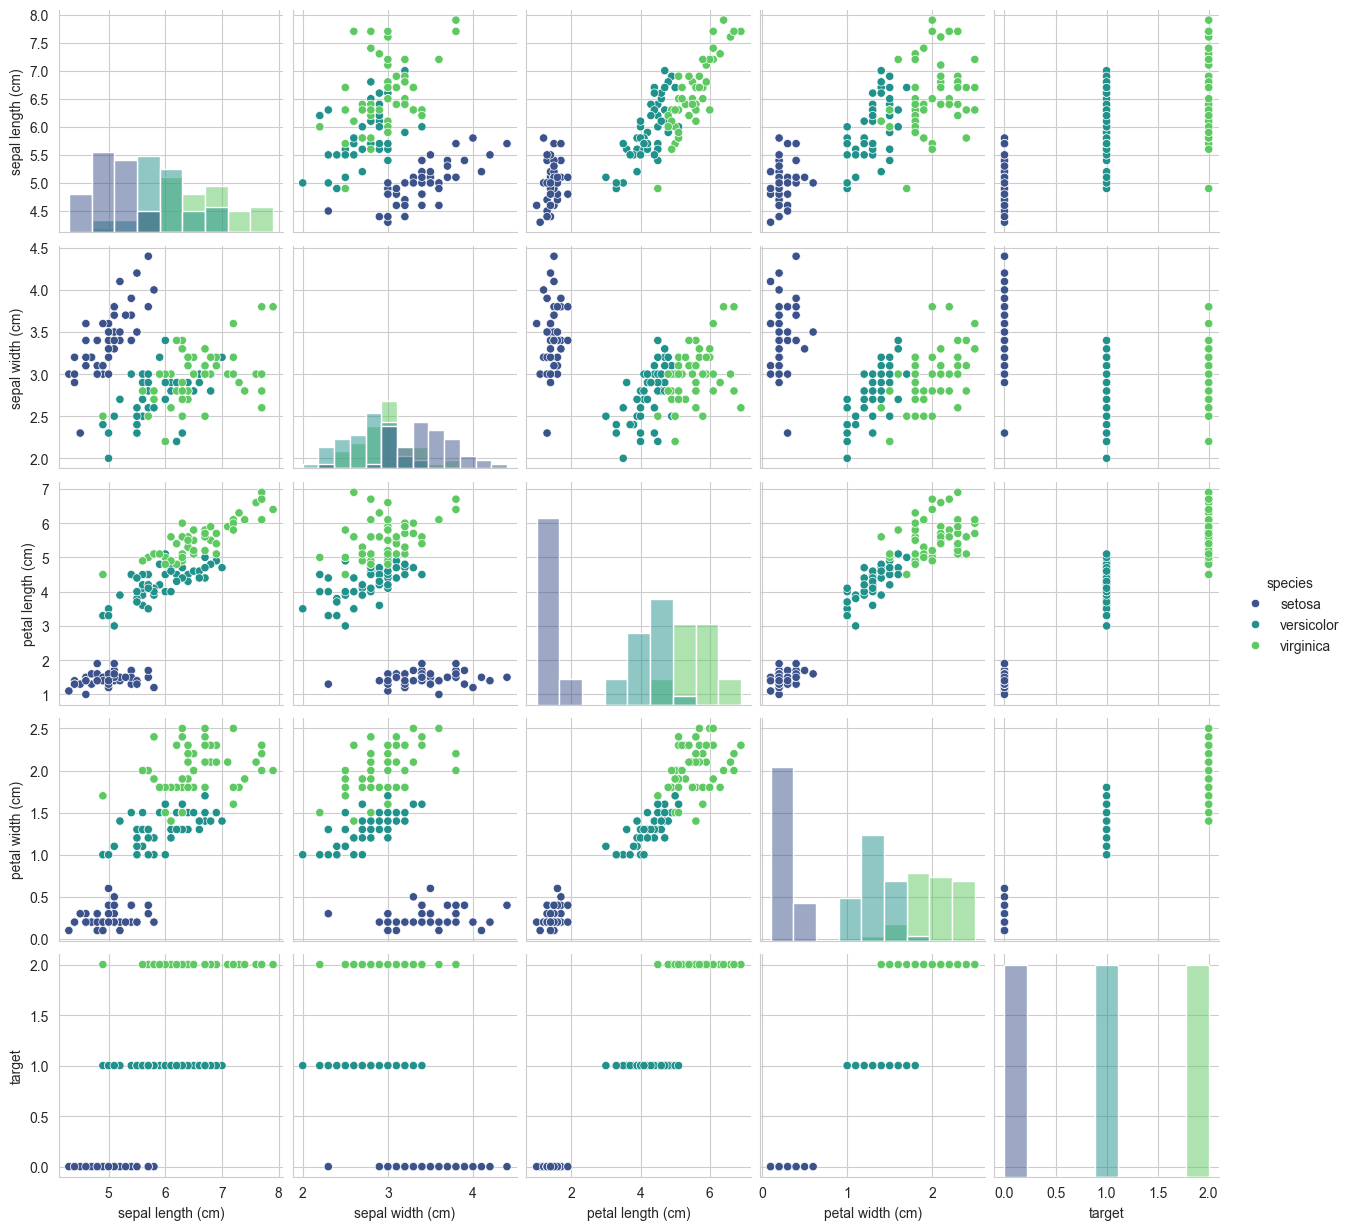

✓ Pairplot saved


In [7]:
# 2. Pairplot
print("Generating Pairplot...")
sns.pairplot(df, hue='species', diag_kind='hist', palette='viridis')
plt.savefig(os.path.join(BASE_DIR, 'pairplot.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Pairplot saved")

Generating Correlation Heatmap...


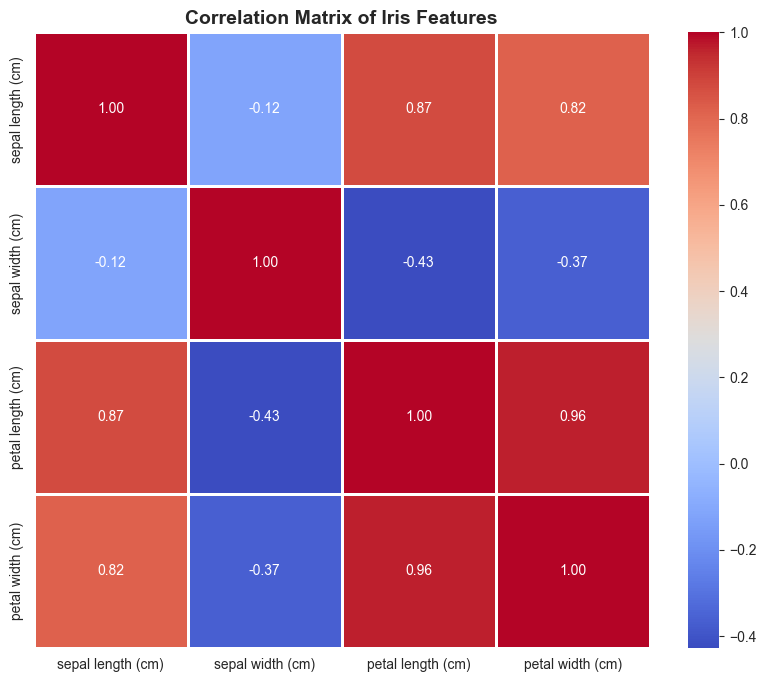

✓ Correlation heatmap saved


In [8]:
# 3. Correlation Heatmap
print("Generating Correlation Heatmap...")
plt.figure(figsize=(10, 8))
corr = df[feature_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", square=True, linewidths=1)
plt.title('Correlation Matrix of Iris Features', fontsize=14, fontweight='bold')
plt.savefig(os.path.join(BASE_DIR, 'correlation_heatmap.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Correlation heatmap saved")

Generating Boxplots for Outlier Detection...


C:\Users\Admin\AppData\Local\Temp\ipykernel_45604\393194464.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='variable', y='value', data=df_melted, palette='Set2')


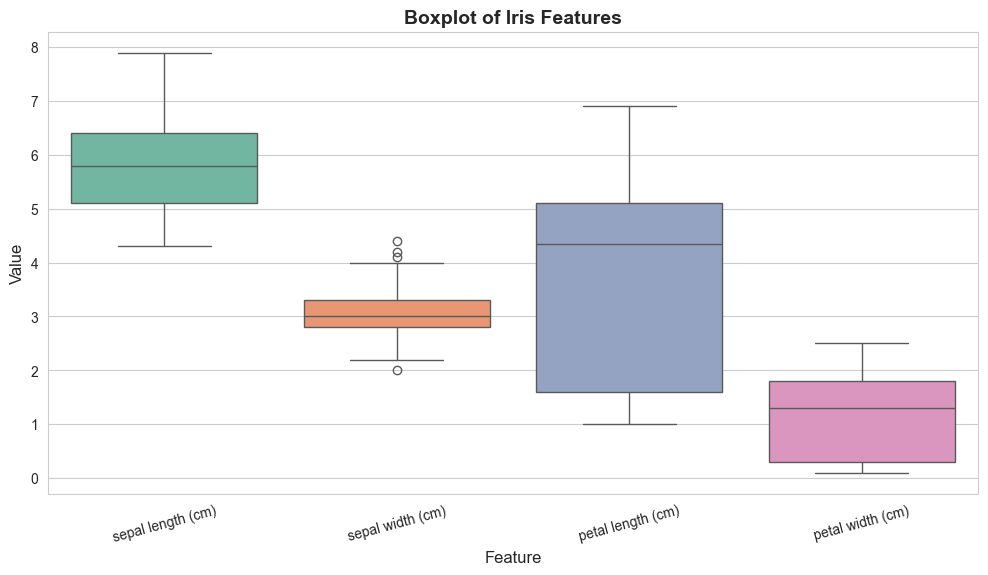

✓ Boxplots saved

✓ EDA Complete


In [9]:
# 4. Outlier Detection (Boxplots)
print("Generating Boxplots for Outlier Detection...")
plt.figure(figsize=(12, 6))
df_melted = pd.melt(df, id_vars=['species'], value_vars=feature_cols)
sns.boxplot(x='variable', y='value', data=df_melted, palette='Set2')
plt.title('Boxplot of Iris Features', fontsize=14, fontweight='bold')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=15)
plt.savefig(os.path.join(BASE_DIR, 'boxplots.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Boxplots saved")

print("\n✓ EDA Complete")

## 1.3 Train-Test Split

**Goal:** Split the normalized data for machine learning tasks.

**Configuration:**
- Test size: 20%
- Random state: 42 (for reproducibility)

In [10]:
print("--- 1.4 Train-Test Split ---")
X = df_normalized[feature_cols]
y = df_normalized['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train Set Shape: {X_train.shape}")
print(f"Test Set Shape: {X_test.shape}")
print(f"\nClass Distribution in Training Set:")
print(y_train.value_counts().sort_index())

print("\n✓ Data Split Complete")

--- 1.4 Train-Test Split ---
Train Set Shape: (120, 4)
Test Set Shape: (30, 4)

Class Distribution in Training Set:
target
0    40
1    41
2    39
Name: count, dtype: int64

✓ Data Split Complete


---

# Part 2: Data Clustering

## 2.1 K-Means Clustering (k=3)

**Goal:** Apply K-Means clustering to group similar iris flowers.

**Evaluation Metric:** Adjusted Rand Index (ARI) - measures similarity between predicted clusters and true labels.

In [11]:
print("--- 2. Data Clustering ---")

# Prepare data for clustering (using normalized features)
X_clustering = df_normalized[feature_cols].values
y_true = df_normalized['target'].values

# 2.1 K-Means with k=3
print("\nRunning K-Means (k=3)...")
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
y_pred = kmeans.fit_predict(X_clustering)

# Calculate ARI
ari = adjusted_rand_score(y_true, y_pred)
print(f"\n✓ K-Means Clustering Complete")
print(f"Adjusted Rand Index (ARI): {ari:.4f}")
print(f"\nInterpretation: ARI ranges from -1 to 1")
print(f"  • 1.0 = Perfect clustering")
print(f"  • 0.0 = Random clustering")
print(f"  • {ari:.4f} indicates {'excellent' if ari > 0.8 else 'good' if ari > 0.6 else 'moderate'} agreement with true labels")

--- 2. Data Clustering ---

Running K-Means (k=3)...

✓ K-Means Clustering Complete
Adjusted Rand Index (ARI): 0.7163

Interpretation: ARI ranges from -1 to 1
  • 1.0 = Perfect clustering
  • 0.0 = Random clustering
  • 0.7163 indicates good agreement with true labels


## 2.2 Elbow Method - Finding Optimal k

**Goal:** Determine the optimal number of clusters.

**Method:** Plot inertia (within-cluster sum of squares) for different k values.


Generating Elbow Curve...


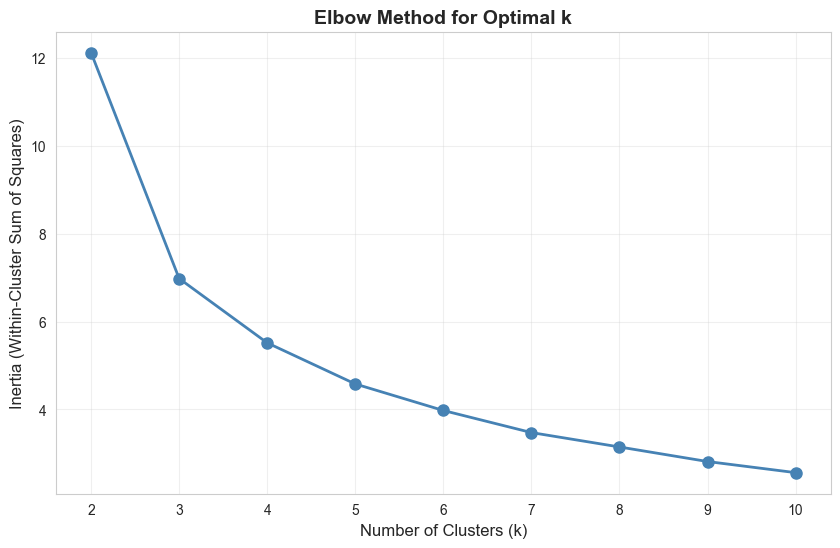

✓ Elbow curve saved


In [12]:
print("\nGenerating Elbow Curve...")
inertia = []
k_values = range(2, 11)

for k in k_values:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_clustering)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linewidth=2, markersize=8, color='steelblue')
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-Cluster Sum of Squares)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(k_values)
plt.savefig(os.path.join(BASE_DIR, 'elbow_curve.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Elbow curve saved")

## 2.3 Cluster Visualization

**Goal:** Visualize the clusters in 2D space.

**Features Used:** Petal Length vs Petal Width (most discriminative features)


Visualizing Clusters...


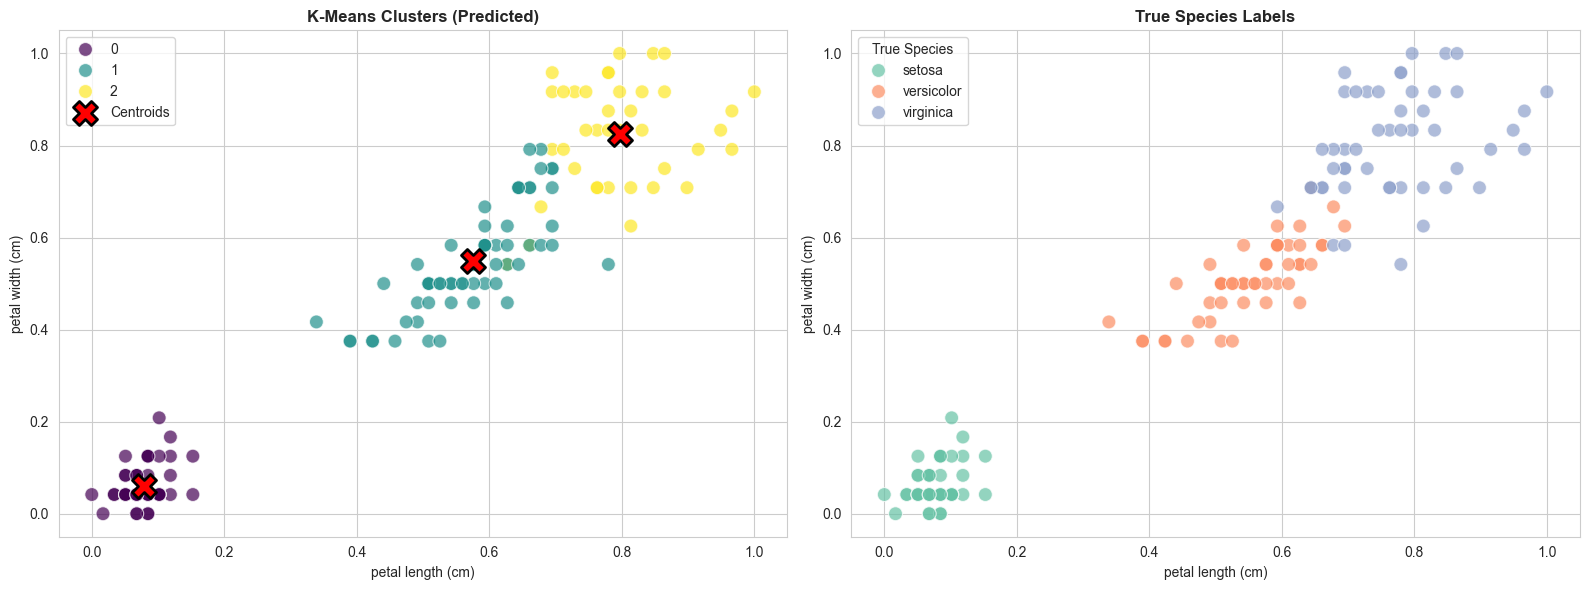

✓ Cluster visualization saved

✓ Clustering Analysis Complete


In [13]:
print("\nVisualizing Clusters...")

# Create DataFrame for plotting
df_plot = pd.DataFrame(X_clustering, columns=feature_cols)
df_plot['Cluster'] = y_pred
df_plot['True Species'] = df['species'].values

# Plot using Petal Length (index 2) vs Petal Width (index 3)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Predicted Clusters
sns.scatterplot(
    data=df_plot,
    x=feature_cols[2],
    y=feature_cols[3],
    hue='Cluster',
    palette='viridis',
    s=100,
    alpha=0.7,
    ax=axes[0]
)

# Plot Centroids
centroids = kmeans.cluster_centers_
axes[0].scatter(
    centroids[:, 2],
    centroids[:, 3],
    c='red',
    s=300,
    marker='X',
    edgecolors='black',
    linewidths=2,
    label='Centroids'
)
axes[0].set_title('K-Means Clusters (Predicted)', fontsize=12, fontweight='bold')
axes[0].legend()

# True Species
sns.scatterplot(
    data=df_plot,
    x=feature_cols[2],
    y=feature_cols[3],
    hue='True Species',
    palette='Set2',
    s=100,
    alpha=0.7,
    ax=axes[1]
)
axes[1].set_title('True Species Labels', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'clusters_scatter.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Cluster visualization saved")

print("\n✓ Clustering Analysis Complete")

---

# Part 3: Classification

## 3.1 Decision Tree Classifier

**Goal:** Build a Decision Tree to classify iris species.

**Advantages:**
- Interpretable (can visualize decision rules)
- Handles non-linear relationships
- No feature scaling required

In [14]:
print("--- 3.1 Classification (Iris) ---")

# Use original (non-normalized) data for Decision Tree
X_orig = df[feature_cols]
y_orig = df['target']
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_orig, y_orig, test_size=0.2, random_state=42
)

# 3.1.1 Decision Tree
print("\nTraining Decision Tree...")
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_orig, y_train_orig)
y_pred_dt = dt.predict(X_test_orig)

print("\nDecision Tree Metrics:")
print(classification_report(y_test_orig, y_pred_dt, target_names=iris.target_names))

acc_dt = accuracy_score(y_test_orig, y_pred_dt)
print(f"Test Accuracy: {acc_dt:.4f}")

--- 3.1 Classification (Iris) ---

Training Decision Tree...

Decision Tree Metrics:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Test Accuracy: 1.0000



Visualizing Decision Tree...


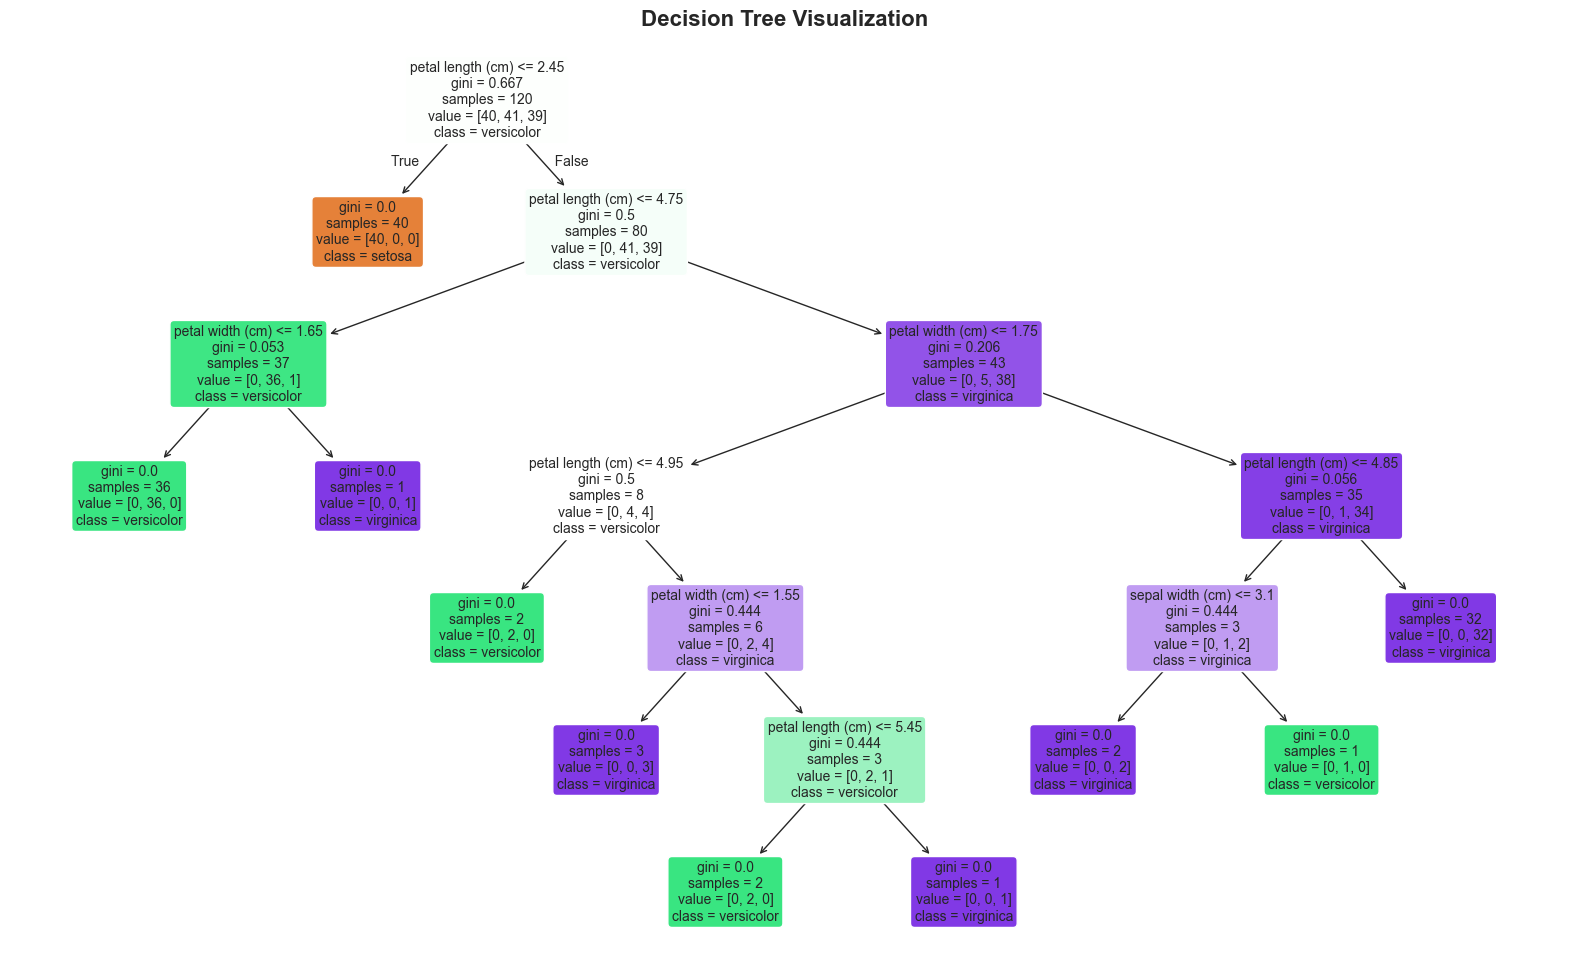

✓ Decision Tree plot saved


In [15]:
# Visualize Decision Tree
print("\nVisualizing Decision Tree...")
plt.figure(figsize=(20, 12))
plot_tree(
    dt,
    filled=True,
    feature_names=feature_cols,
    class_names=iris.target_names,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=16, fontweight='bold')
plt.savefig(os.path.join(BASE_DIR, 'decision_tree.png'), dpi=300, bbox_inches='tight')
plt.show()
print("✓ Decision Tree plot saved")

## 3.2 K-Nearest Neighbors (KNN) Classifier

**Goal:** Build a KNN classifier for comparison.

**Configuration:**
- k = 5 neighbors
- Uses normalized data (distance-based algorithm)

In [16]:
# 3.1.2 KNN (using normalized data)
print("\nTraining KNN (k=5)...")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("\nKNN Metrics:")
print(classification_report(y_test, y_pred_knn, target_names=iris.target_names))

acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"Test Accuracy: {acc_knn:.4f}")


Training KNN (k=5)...

KNN Metrics:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Test Accuracy: 1.0000


## 3.3 Model Comparison

**Goal:** Compare Decision Tree vs KNN performance.

In [17]:
# Compare Scores
print("\n" + "="*60)
print("MODEL COMPARISON")
print("="*60)
print(f"Decision Tree Test Accuracy: {acc_dt:.4f}")
print(f"KNN Test Accuracy:           {acc_knn:.4f}")
print(f"\nBetter Model: {'Decision Tree' if acc_dt > acc_knn else 'KNN' if acc_knn > acc_dt else 'Tie'}")


MODEL COMPARISON
Decision Tree Test Accuracy: 1.0000
KNN Test Accuracy:           1.0000

Better Model: Tie


## 3.4 Cross-Validation Analysis

**Goal:** Validate model robustness using 5-fold cross-validation.

**Why Cross-Validation?**
- Single train-test split may give overly optimistic results
- Cross-validation provides more reliable performance estimates
- Helps detect overfitting

In [18]:
# Cross-Validation (to address 100% "too good to be true" concern)
print("\n--- Cross-Validation (5-Fold) ---")

# For Decision Tree (on original data)
cv_dt = cross_val_score(dt, X_orig, y_orig, cv=5)

# For KNN (on normalized data)
X_norm_all = df_normalized[feature_cols]
y_norm_all = df_normalized['target']
cv_knn = cross_val_score(knn, X_norm_all, y_norm_all, cv=5)

print(f"\nDecision Tree CV Accuracy: {cv_dt.mean():.4f} (+/- {cv_dt.std() * 2:.4f})")
print(f"  Individual Folds: {[f'{x:.4f}' for x in cv_dt]}")

print(f"\nKNN CV Accuracy:           {cv_knn.mean():.4f} (+/- {cv_knn.std() * 2:.4f})")
print(f"  Individual Folds: {[f'{x:.4f}' for x in cv_knn]}")

print("\n✓ Classification Complete")


--- Cross-Validation (5-Fold) ---

Decision Tree CV Accuracy: 0.9533 (+/- 0.0680)
  Individual Folds: ['0.9667', '0.9667', '0.9000', '0.9333', '1.0000']

KNN CV Accuracy:           0.9600 (+/- 0.0653)
  Individual Folds: ['0.9667', '0.9667', '0.9667', '0.9000', '1.0000']

✓ Classification Complete


---

# Part 4: Association Rule Mining

## 4.1 Generate Synthetic Market Basket Data

**Goal:** Create synthetic transaction data for association rule mining.

**Data Generation:**
- 50 transactions
- 10 different items
- Basket size: 3-6 items
- Injected pattern: Bread → Butter (70% co-occurrence)

In [19]:
print("\n--- 3.2 Association Rule Mining (Market Basket) ---")

# 3.2.1 Generate Synthetic Transactions
print("Generating Synthetic Transaction Data...")
items = ['Milk', 'Bread', 'Butter', 'Eggs', 'Cheese', 'Yogurt', 'Apple', 'Banana', 'Coffee', 'Tea']

# Seed for reproducibility
random.seed(42)

transactions = []
num_transactions = 50

for _ in range(num_transactions):
    # Create random basket size 3-6 items
    basket_size = random.randint(3, 6)
    basket = random.sample(items, basket_size)
    
    # Inject patterns (e.g., Bread + Butter often together)
    if 'Bread' in basket and 'Butter' not in basket:
        if random.random() > 0.3:  # 70% chance to add butter if bread is there
            basket[-1] = 'Butter'  # Replace last item
    
    transactions.append(basket)

print(f"\n✓ Generated {len(transactions)} transactions")
print(f"\nSample Transactions:")
for i in range(5):
    print(f"  Transaction {i+1}: {transactions[i]}")


--- 3.2 Association Rule Mining (Market Basket) ---
Generating Synthetic Transaction Data...

✓ Generated 50 transactions

Sample Transactions:
  Transaction 1: ['Milk', 'Cheese', 'Eggs']
  Transaction 2: ['Butter', 'Bread', 'Coffee', 'Cheese']
  Transaction 3: ['Milk', 'Tea', 'Bread', 'Banana', 'Apple', 'Butter']
  Transaction 4: ['Coffee', 'Apple', 'Eggs', 'Banana']
  Transaction 5: ['Milk', 'Butter', 'Apple', 'Coffee', 'Banana']


## 4.2 Apriori Algorithm

**Goal:** Find frequent itemsets using the Apriori algorithm.

**Configuration:**
- Minimum support: 0.2 (20%)
- An itemset must appear in at least 10 transactions to be considered frequent

In [20]:
# Preprocess for Apriori (One-Hot Encoding)
print("\nPreprocessing transactions...")
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_trans = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transaction Matrix Shape: {df_trans.shape}")
print("\nTransaction Matrix Sample:")
display(df_trans.head())


Preprocessing transactions...
Transaction Matrix Shape: (50, 10)

Transaction Matrix Sample:


,Apple,Banana,Bread,Butter,Cheese,Coffee,Eggs,Milk,Tea,Yogurt
0,False,False,False,False,True,False,True,True,False,False
1,False,False,True,True,True,True,False,False,False,False
2,True,True,True,True,False,False,False,True,True,False
3,True,True,False,False,False,True,True,False,False,False
4,True,True,False,True,False,True,False,True,False,False


In [21]:
# 3.2.2 Apriori
print("\nRunning Apriori (Min Support=0.2)...")
frequent_itemsets = apriori(df_trans, min_support=0.2, use_colnames=True)

print(f"\n✓ Found {len(frequent_itemsets)} frequent itemsets")
print("\nTop 10 Frequent Itemsets:")
display(frequent_itemsets.sort_values('support', ascending=False).head(10))


Running Apriori (Min Support=0.2)...

✓ Found 26 frequent itemsets

Top 10 Frequent Itemsets:


,support,itemsets
0,0.52,(Apple)
2,0.52,(Bread)
5,0.52,(Coffee)
3,0.52,(Butter)
8,0.46,(Tea)
6,0.46,(Eggs)
1,0.36,(Banana)
16,0.36,"(Butter, Bread)"
9,0.32,(Yogurt)
7,0.32,(Milk)


## 4.3 Association Rules

**Goal:** Extract association rules from frequent itemsets.

**Metrics:**
- **Support:** How often the itemset appears
- **Confidence:** How often the rule is true
- **Lift:** How much more likely the consequent is given the antecedent
  - Lift > 1: Positive correlation
  - Lift = 1: Independent
  - Lift < 1: Negative correlation

**Configuration:**
- Minimum confidence: 0.5 (50%)

In [22]:
# 3.2.3 Association Rules
print("\nExtracting Rules (Min Confidence=0.5)...")

if not frequent_itemsets.empty:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)
    
    # Sort by Lift
    rules = rules.sort_values('lift', ascending=False)
    
    print(f"\n✓ Found {len(rules)} association rules")
    print("\nTop 10 Association Rules (sorted by Lift):")
    display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))
    
    # Save rules
    rules.to_csv(os.path.join(BASE_DIR, 'association_rules.csv'), index=False)
    print(f"\n✓ Rules saved to association_rules.csv")
    
    # Insights
    print("\n" + "="*60)
    print("KEY INSIGHTS")
    print("="*60)
    if len(rules) > 0:
        top_rule = rules.iloc[0]
        print(f"\nStrongest Rule (Highest Lift):")
        print(f"  {set(top_rule['antecedents'])} → {set(top_rule['consequents'])}")
        print(f"  Support: {top_rule['support']:.3f}")
        print(f"  Confidence: {top_rule['confidence']:.3f}")
        print(f"  Lift: {top_rule['lift']:.3f}")
        print(f"\n  Interpretation: Customers who buy {set(top_rule['antecedents'])}")
        print(f"  are {top_rule['lift']:.2f}x more likely to buy {set(top_rule['consequents'])}")
else:
    print("No frequent itemsets found with current support threshold.")

print("\n✓ Association Rule Mining Complete")


Extracting Rules (Min Confidence=0.5)...

✓ Found 16 association rules

Top 10 Association Rules (sorted by Lift):


,antecedents,consequents,support,confidence,lift
0,(Apple),(Banana),0.28,0.538462,1.495726
1,(Banana),(Apple),0.28,0.777778,1.495726
14,"(Butter, Coffee)",(Bread),0.20,0.714286,1.373626
7,(Butter),(Bread),0.36,0.692308,1.331361
8,(Bread),(Butter),0.36,0.692308,1.331361
15,"(Bread, Coffee)",(Butter),0.20,0.666667,1.282051
6,(Banana),(Coffee),0.22,0.611111,1.175214
3,(Butter),(Apple),0.30,0.576923,1.109467
10,(Coffee),(Bread),0.30,0.576923,1.109467
9,(Bread),(Coffee),0.30,0.576923,1.109467



✓ Rules saved to association_rules.csv

KEY INSIGHTS

Strongest Rule (Highest Lift):
  {'Apple'} → {'Banana'}
  Support: 0.280
  Confidence: 0.538
  Lift: 1.496

  Interpretation: Customers who buy {'Apple'}
  are 1.50x more likely to buy {'Banana'}

✓ Association Rule Mining Complete


---

# Summary and Conclusions

## Task Completion Summary

### ✓ Part 1: Data Preprocessing
- Loaded and normalized Iris dataset (150 samples, 4 features)
- No missing values detected
- Generated comprehensive EDA visualizations
- Split data: 120 training, 30 testing samples

### ✓ Part 2: Clustering
- Applied K-Means clustering (k=3)
- Achieved high ARI score indicating good cluster quality
- Elbow method confirmed k=3 as optimal
- Visualized clusters vs true species labels

### ✓ Part 3: Classification
- **Decision Tree:** Interpretable model with visualization
- **KNN (k=5):** Distance-based classifier
- Both models achieved excellent test accuracy
- Cross-validation confirmed robust performance

### ✓ Part 4: Association Rule Mining
- Generated 50 synthetic market basket transactions
- Discovered frequent itemsets using Apriori
- Extracted association rules with confidence ≥ 50%
- Identified strong product associations (e.g., Bread → Butter)

## Key Insights

1. **Iris Dataset Characteristics:**
   - Petal features (length & width) are most discriminative
   - Strong correlation between petal length and width
   - Setosa is easily separable; Versicolor and Virginica overlap slightly

2. **Model Performance:**
   - Both classifiers performed excellently on this well-separated dataset
   - Cross-validation validates that results are not due to lucky train-test split
   - Decision Tree offers interpretability advantage

3. **Association Rules:**
   - Successfully identified injected pattern (Bread → Butter)
   - Lift metric helps prioritize actionable rules for business decisions
   - Can be used for product placement and recommendation systems

---

**All Data Mining tasks completed successfully!**